In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregar arquivo
df_exames = pd.read_csv('./datasets/exame_diabetes.csv')

In [3]:
# Visualizar Estrutura
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [4]:
# Apresentar as 10 primeiras linhas
df_exames.head(10)

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100
5,6,M,64,93,190,117
6,7,F,21,70,182,90
7,8,F,60,101,179,84
8,9,F,63,83,189,92
9,10,F,65,78,175,121


In [5]:
df_exames['genero'].unique()

array(['M', 'F'], dtype=object)

In [6]:
# Remover coluna id_paciente
df_exames.drop(columns=['id_paciente'], axis=1, inplace=True)

In [7]:
# Converter uma variável categórica (genero) em numérica usando One-Hot Encoding
df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype='int64')

In [8]:
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1
5,64,93,190,117,0,1
6,21,70,182,90,1,0
7,60,101,179,84,1,0
8,63,83,189,92,1,0
9,65,78,175,121,1,0


<Axes: >

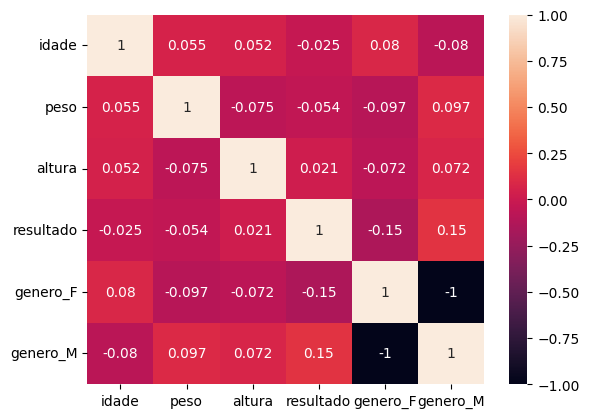

In [9]:
# Apresentar Mapa de Calor com Correlação entre as variáveis
sns.heatmap(df_exames.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

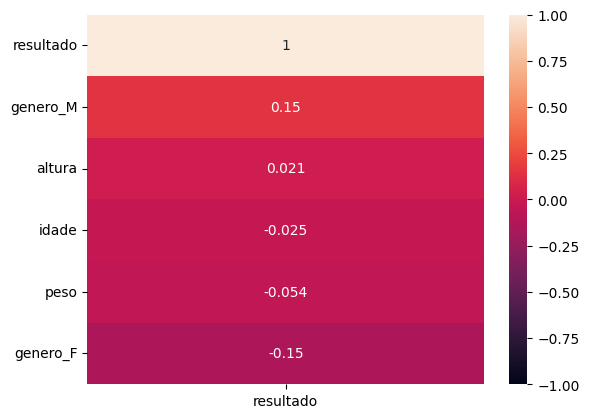

In [10]:
# Mapa de Correlação só com a variável target (resultado)
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado', ascending=False), vmin=-1, vmax=1, annot=True)

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>],
       [<Axes: xlabel='idade', ylabel='resultado'>,
        <Axes: xlabel='peso', ylabel='resultado'>,


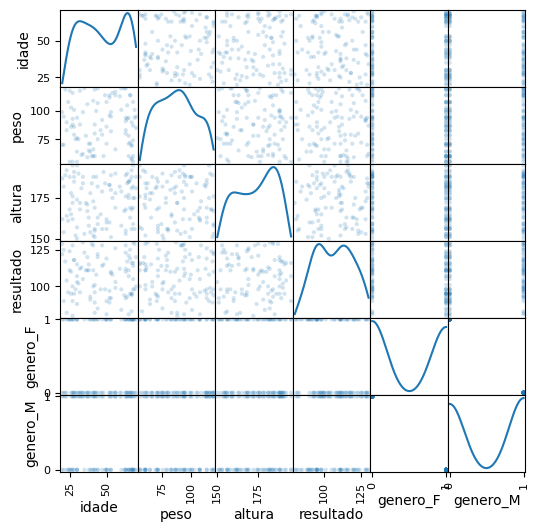

In [11]:
# Plot de Scatter (Dispersão) com Distribuição
pd.plotting.scatter_matrix(df_exames, alpha=0.2, figsize=(6, 6), diagonal='kde')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>,
        <Axes: title={'center': 'resultado'}>],
       [<Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>, <Axes: >, <Axes: >]],
      dtype=object)

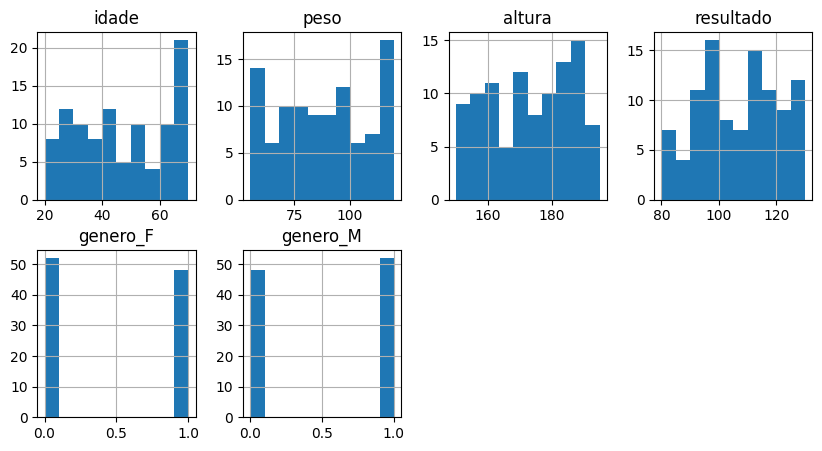

In [12]:
# Histograma de todas as variáveis
df_exames.hist(layout=(2, 4), figsize=(10, 5))

In [13]:
# Criar uma feature nova
# IMC (Índice de Massa Corporal)
# IMC = peso (kg) / altura (m) ^2
df_exames['imc'] = df_exames['peso'] / (df_exames['altura'] / 100) ** 2

In [14]:
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682
5,64,93,190,117,0,1,25.761773
6,21,70,182,90,1,0,21.132713
7,60,101,179,84,1,0,31.522112
8,63,83,189,92,1,0,23.235632
9,65,78,175,121,1,0,25.469388


In [15]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idade      100 non-null    int64  
 1   peso       100 non-null    int64  
 2   altura     100 non-null    int64  
 3   resultado  100 non-null    int64  
 4   genero_F   100 non-null    int64  
 5   genero_M   100 non-null    int64  
 6   imc        100 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 5.6 KB


In [16]:
dict_regressao = {
  'tempo_casa': [1, 3, 6, 9, 10, 14, 18], 
  'salario': [1500, 3000, 4500, 6000, 7000, 8500, 10000]
}

In [17]:
df_regressao_simples = pd.DataFrame.from_dict(dict_regressao)

<Axes: xlabel='tempo_casa', ylabel='salario'>

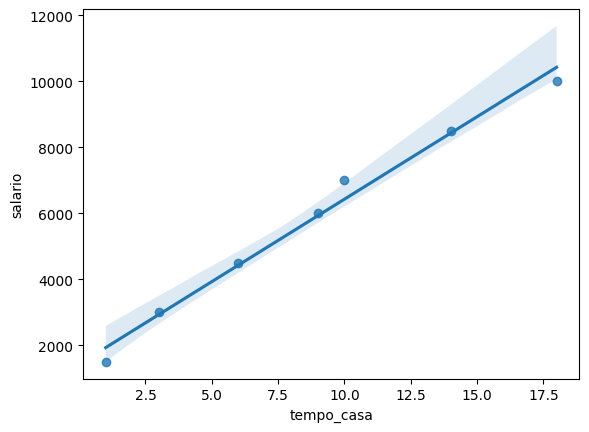

In [19]:
sns.regplot(data=df_regressao_simples, x='tempo_casa', y='salario')

In [20]:
# Importar bibliotecas do sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [21]:
df_exames

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682
...,...,...,...,...,...,...,...
95,52,96,183,89,1,0,28.666129
96,68,108,169,105,1,0,37.813802
97,21,95,154,125,0,1,40.057345
98,41,109,173,128,0,1,36.419526


In [22]:
# Modelo 1 - Sem IMC
X = df_exames.drop(columns=['resultado', 'imc'])
y = df_exames['resultado']

In [27]:
# Dividir conjuntos entre treino e teste
# train_size = Porcentagem do conjunto de treinamento: 70%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [34]:
y_test

71     92
43    103
11    115
83    112
78    126
19    116
80     81
4     100
79    120
75    110
72    100
44    130
46    102
90     97
56    123
2      93
47    123
51    116
0      98
97    125
65     93
12    111
32    107
82    128
66     96
14     80
81    119
91    113
15     91
74    128
Name: resultado, dtype: int64

In [35]:
# Treinar o algoritmo de Regressão Linear - Modelo 1
model_1 = LinearRegression().fit(X_train, y_train)

In [36]:
# Gerar Predições do conjunto de testes com base no Modelo 1
y_pred = model_1.predict(X_test)

In [37]:
y_pred

array([ 99.6684178 , 111.15467732, 113.11211654, 108.92788908,
       106.38206401, 107.30939688, 109.65461594, 112.00335574,
       111.06900447, 109.78672617, 112.35808062, 112.28232464,
       111.9380202 , 108.10634945,  98.35810505, 108.24066307,
       107.47444699, 107.86866238, 108.45528721, 106.47405474,
       108.68462818, 107.39800684, 105.52920918, 101.5310878 ,
       107.73027652, 103.02436766, 105.65307386, 112.03833836,
       105.49217347, 100.44933075])

In [38]:
# Equação da Reta - Regressão Linear
# y = ax + b
model_1.coef_

array([-0.00694816, -0.0788198 ,  0.10991808, -2.96913112,  2.96913112])

In [39]:
model_1.intercept_

94.21133142019855

In [41]:
# R2 Score: quanto que x explica o y, quanto mais próximo de 1 melhor
# R2 Score - Conjunto de Treinamento 
model_1.score(X_train, y_train)

0.06218388634297234

In [42]:
# R2 Score - Conjunto de Testes
model_1.score(X_test, y_test)

-0.13640904479106375

In [43]:
# RS Score - Testes
r2_score(y_test, y_pred)

-0.13640904479106375

In [45]:
# MAE (Mean Absolute Error)
mean_absolute_error(y_test, y_pred)

12.695569181179543

In [46]:
# Segundo Modelo - Apenas ICM
X = pd.DataFrame(df_exames['imc'])
y = df_exames['resultado']

In [47]:
# Dividir conjuntos entre treino e teste
# train_size = Porcentagem do conjunto de treinamento: 70%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [48]:
# Treinar o algoritmo de Regressão Linear - Modelo 2
model_2 = LinearRegression().fit(X_train, y_train)

In [50]:
# Gerar Predição com base no modelo para o conjunto de testes
y_pred = model_2.predict(X_test)

In [51]:
model_2.coef_

array([-0.21677589])

In [52]:
model_2.intercept_

112.15019229088837

In [53]:
# R2 Score no Conjunto de Treinamento
model_2.score(X_train, y_train)

0.01528596266480664

In [54]:
# R2 Score no Conjunto de Testes
model_2.score(X_test, y_test)

-0.08898328562401758

In [55]:
# MAE (Mean Absolute Error)
mean_absolute_error(y_test, y_pred)

12.5056514070601

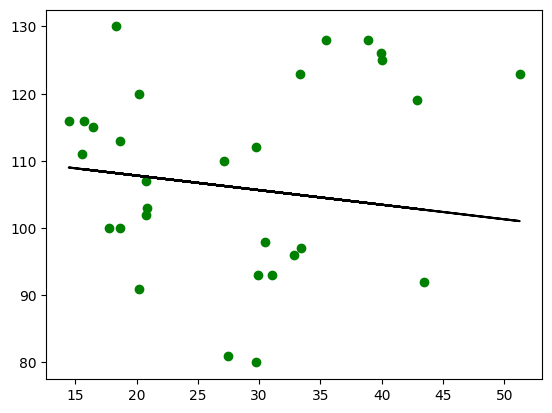

In [57]:
# Mostrar como a reta foi calculada
plt.scatter(X_test, y_test, color='g')
plt.plot(X_test, y_pred, color='k')